# RAVOAVISON Fenomanana Irénée Stevenson MAFI M1 

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


In [2]:
df = pd.read_csv("dataR.csv")

target = "loan_paid_back"  
X = df.drop(columns=[target])
y = df[target]
display(df.head())

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB
None

Valeurs manquantes :
id                 

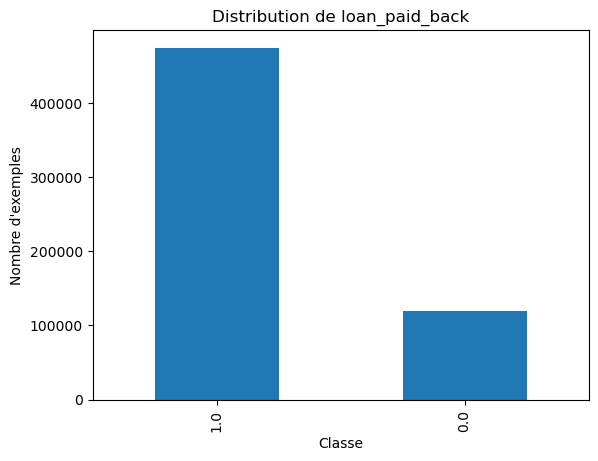


Statistiques descriptives :
                  id  annual_income  debt_to_income_ratio   credit_score  \
count  593994.000000  593994.000000         593994.000000  593994.000000   
mean   296996.500000   48212.202976              0.120696     680.916009   
std    171471.442235   26711.942078              0.068573      55.424956   
min         0.000000    6002.430000              0.011000     395.000000   
25%    148498.250000   27934.400000              0.072000     646.000000   
50%    296996.500000   46557.680000              0.096000     682.000000   
75%    445494.750000   60981.320000              0.156000     719.000000   
max    593993.000000  393381.740000              0.627000     849.000000   

         loan_amount  interest_rate  loan_paid_back  
count  593994.000000  593994.000000   593994.000000  
mean    15020.297629      12.356345        0.798820  
std      6926.530568       2.008959        0.400883  
min       500.090000       3.200000        0.000000  
25%     10279.62

In [3]:



# Informations générales
print(df.info())

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Distribution de la variable cible
print("\nDistribution de la cible :")
print(df["loan_paid_back"].value_counts(normalize=True))

# Graphe : distribution de la cible
plt.figure()
df["loan_paid_back"].value_counts().plot(kind="bar")
plt.title("Distribution de loan_paid_back")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()

# Statistiques des variables numériques
print("\nStatistiques descriptives :")
print(df.describe())


loan_paid_back          0.0       1.0
employment_status                    
Employed           0.105855  0.894145
Retired            0.002796  0.997204
Self-employed      0.101543  0.898457
Student            0.736485  0.263515
Unemployed         0.922381  0.077619


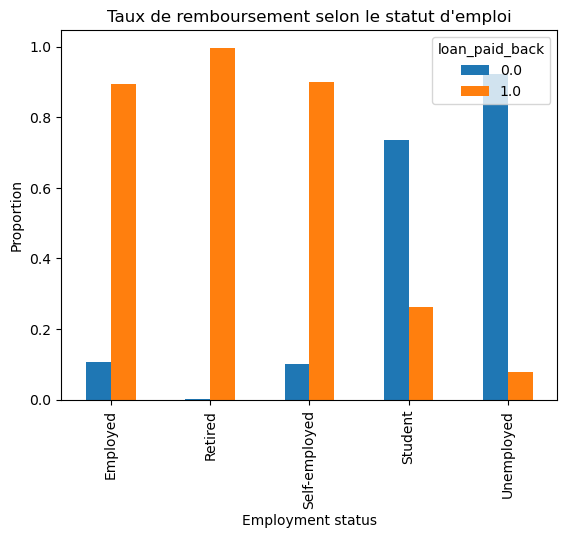

In [4]:
# Table croisée(Permet de voir la relation directe entre statut d’emploi et remboursement.)
table = pd.crosstab(
    df["employment_status"],
    df["loan_paid_back"],
    normalize="index"
)

print(table)

import matplotlib.pyplot as plt

table.plot(kind="bar")
plt.title("Taux de remboursement selon le statut d'emploi")
plt.xlabel("Employment status")
plt.ylabel("Proportion")
plt.legend(title="loan_paid_back")
plt.show()



In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
print(f"Splits -> train:{X_train.shape}, val:{X_val.shape}, test:{X_test.shape}")


Splits -> train:(356396, 12), val:(118799, 12), test:(118799, 12)


In [6]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


In [7]:
SKLEARN_VERSION = tuple(map(int, sklearn.__version__.split(".")[:2]))

if SKLEARN_VERSION >= (1, 2):
    ohe_sparse = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=True
    )
    ohe_dense = OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    )
else:
    ohe_sparse = OneHotEncoder(
        handle_unknown="ignore",
        sparse=True
    )
    ohe_dense = OneHotEncoder(
        handle_unknown="ignore",
        sparse=False
    )


In [8]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", ohe_sparse)
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ],
    remainder="drop"
)

categorical_pipeline_dense = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", ohe_dense)
])

preprocessor_dense = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline_dense, cat_cols)
    ],
    remainder="drop"
)


In [9]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000
    ),

    "DecisionTree": DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    ),

    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    ),

    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        random_state=42
    ),

    "LinearSVC": LinearSVC(
        max_iter=5000
    ),

    "GaussianNB": GaussianNB(),

    "LogReg_L1": LogisticRegression(
        penalty="l1",
        solver="liblinear",
        max_iter=1000
    )
}


In [10]:
pipelines = {}

for name, model in models.items():
    if name == "GaussianNB":
        pipelines[name] = Pipeline([
            ("preprocess", preprocessor_dense),
            ("clf", model)
        ])
    else:
        pipelines[name] = Pipeline([
            ("preprocess", preprocessor),
            ("clf", model)
        ])


In [11]:
def evaluate_models(pipelines, X_train, y_train, X_val, y_val):
    results = []

    for name, pipe in pipelines.items():
        print(f"Validation de {name}...")

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_val)

        if hasattr(pipe.named_steps["clf"], "predict_proba"):
            y_score = pipe.predict_proba(X_val)[:, 1]
            roc = roc_auc_score(y_val, y_score)
        else:
            roc = np.nan

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision": precision_score(y_val, y_pred, zero_division=0),
            "Recall": recall_score(y_val, y_pred, zero_division=0),
            "F1": f1_score(y_val, y_pred, zero_division=0),
            "ROC_AUC": roc
        })

    return pd.DataFrame(results).set_index("Model")


In [12]:
df_results = evaluate_models(
    pipelines,
    X_train, y_train,
    X_val, y_val
)

df_results


Validation de LogisticRegression...
Validation de DecisionTree...
Validation de RandomForest...
Validation de GradientBoosting...
Validation de AdaBoost...


/home/iamsteve/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation de LinearSVC...
Validation de GaussianNB...
Validation de LogReg_L1...


,Accuracy,Precision,Recall,F1,ROC_AUC
Model,,,,,
LogisticRegression,0.901969,0.908467,0.975574,0.940826,0.910336
DecisionTree,0.902423,0.903928,0.982244,0.941460,0.912579
RandomForest,0.901043,0.897779,0.988693,0.941045,0.910785
GradientBoosting,0.904334,0.905584,0.982697,0.942566,0.915419
AdaBoost,0.901767,0.912168,0.970474,0.940418,0.915223
LinearSVC,0.899864,0.902111,0.981106,0.939952,NaN
GaussianNB,0.693625,0.947687,0.652483,0.772855,0.868936
LogReg_L1,0.901986,0.908469,0.975595,0.940836,0.910344


In [13]:
def top3_models(perf_df, weights=None):
    """
    Renvoie les noms des 3 meilleurs modèles en fonction de la moyenne pondérée des métriques.
    
    perf_df : DataFrame avec les métriques, index = noms des modèles
    weights : dictionnaire avec le poids de chaque métrique, exemple :
        {"Accuracy": 0.1, "Precision": 0.2, "Recall": 0.2, "F1": 0.3, "ROC_AUC": 0.2}
    """
    if weights is None:
        # Poids par défaut : F1 et ROC_AUC plus importants
        weights = {"Accuracy": 0.1, "Precision": 0.2, "Recall": 0.2, "F1": 0.3, "ROC_AUC": 0.2}
    
    # Calcul de la moyenne pondérée
    perf_df["score_moyen"] = perf_df.apply(
        lambda row: sum(row[metric] * weights.get(metric, 0) for metric in weights), axis=1
    )
    
    # Tri et récupération des 3 meilleurs noms
    top3_names = perf_df.sort_values("score_moyen", ascending=False).head(3).index.tolist()
    
    return top3_names
top3_models(df_results,weights=None)

['GradientBoosting', 'DecisionTree', 'AdaBoost']

In [ ]:
#Optimisation pour GradientBoosting
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor_dense),
    ("clf", GradientBoostingClassifier(random_state=42))
])

gb_param_dist = {
    "clf__n_estimators": [80, 100, 120, 150],
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__max_depth": [3, 4, 5]
}

gb_search = RandomizedSearchCV(
    gb_pipeline,
    param_distributions=gb_param_dist,
    n_iter=15,          # 🚀 rapide
    cv=3,               # suffisant
    scoring="f1",       # déséquilibre
    n_jobs=-1,
    random_state=42,
    verbose=2
)

gb_search.fit(X_train, y_train)

print("GradientBoosting – meilleurs paramètres :")
print(gb_search.best_params_)


In [ ]:
# Optimisation pour decision tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

dt_param_dist = {
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5]
}

dt_search = RandomizedSearchCV(
    dt_pipeline,
    param_distributions=dt_param_dist,
    n_iter=15,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

dt_search.fit(X_train, y_train)

print("DecisionTree – meilleurs paramètres :")
print(dt_search.best_params_)


In [ ]:
ada_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", AdaBoostClassifier(random_state=42))
])

ada_param_dist = {
    "clf__n_estimators": [50, 100, 150, 200],
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.5]
}

ada_search = RandomizedSearchCV(
    ada_pipeline,
    param_distributions=ada_param_dist,
    n_iter=15,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

ada_search.fit(X_train, y_train)

print("AdaBoost – meilleurs paramètres :")
print(ada_search.best_params_)


In [1]:
# Evaluation finale 
pipelines = {
    "GradientBoosting_Optimized": gb_search.best_estimator_,
    "DecisionTree_Optimized": dt_search.best_estimator_,
    "AdaBoost_Optimized": ada_search.best_estimator_
}

# Évaluer les 3 modèles sur les métriques définies
df_perf = evaluate_models(
    pipelines,
    X_temp, y_temp,  # X_temp ,y_temp contient à la fois X_train,y_train et X_val,y_val
    X_test, y_test
)

print(df_perf)
